# Dimensionality reduction using Keras Auto Encoder

* Prepare Data
* Design Auto Encoder
* Train Auto Encoder
* Use Encoder level from Auto Encoder
* Use Encoder to obtain reduced dimensionality data for train and test sets

In [107]:
import os
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

from numpy.random import seed
from sklearn.preprocessing import minmax_scale
from sklearn.model_selection import train_test_split
from keras.layers import Input, Dense
from keras.models import Model
import xgboost
import numpy as np
import pandas as pd
import seaborn as sns
from math import sqrt
import matplotlib.pyplot as plt
from sklearn import preprocessing
import matplotlib.pyplot as plote

from sklearn import cross_validation, metrics
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor

print(os.listdir("../input"))

['train.csv', 'sample_submission.csv', 'test.csv']


## Read train and test data

In [108]:
train = pd.read_csv('../input/train.csv')
test = pd.read_csv('../input/test.csv')

In [109]:
train2 = train.copy()
train3 = train.copy()

## Dropping Target and ID's from train and test

In [110]:
#target = train['target']
#train_id = train['ID']
#test_id = test['ID']

#train.drop(['target'], axis=1, inplace=True)
#train.drop(['ID'], axis=1, inplace=True)
#test.drop(['ID'], axis=1, inplace=True)

In [111]:
print('Train data shape', X_train.shape)
print('Test data shape', X_test.shape)

Train data shape (3567, 4991)
Test data shape (892, 4991)


### Scaling Train and Test data for Neural Net

In [112]:
#train_scaled = minmax_scale(train, axis = 0)
#test_scaled = min3max_scale(test, axis = 0)
scale_list = train3.columns[1:]
sc = train3[scale_list]
scaler = StandardScaler()
sc = scaler.fit_transform(sc)
train3[scale_list] = sc
train3[scale_list].head()



,target,48df886f9,0deb4b6a8,34b15f335,a8cb14b00,2f0771a37,30347e683,d08d1fbe3,6ee66e115,20aa07010,dc5a8f1d8,11d86fa6a,77c9823f2,8d6c2a0b2,4681de4fd,adf119b9a,cff75dd09,96f83a237,b8a716ebf,6c7a4567c,4fcfd2b4d,f3b9c0b95,71cebf11c,d966ac62c,68b647452,c88d108c9,ff7b471cd,d5308d8bc,0d866c3d7,bc3f77679,bd8f989f1,0eff5bf95,22ed6dba3,92b13ebba,c330f1a67,233c7c17c,2cb4d123e,eeac16933,87ffda550,822e49b95,...,969caa87a,00302fe51,1189ee335,ca04a07ca,f6f15ffa5,841704460,ea5ed6ff7,b1bb8eac3,8132d18b8,c24ea6548,cdfc2b069,2a879b4f7,6b119d8ce,98dea9e42,9f2471031,88458cb21,f40da20f4,7ad6b38bd,c901e7df1,8f55955dc,85dcc913d,5ca0b9b0c,eab8abf7a,8d8bffbae,2a1f6c7f9,9437d8b64,5831f4c76,2e84e09c5,d45fd5508,a165f5761,3ecc09859,9281abeea,8675bec0b,3a13ed79a,f677d4d13,71b203550,137efaa80,fb36b89d9,7e293fbaf,9fc776466
0,3.893303,-0.037646,-0.021639,-0.04689,-0.019205,-0.017437,-0.053221,-0.022451,-0.024846,-0.267393,-0.097765,-0.081369,-0.014977,-0.028876,-0.145479,-0.088577,-0.056368,-0.032868,-0.122579,-0.050539,-0.06967,-0.070391,-0.028072,-0.063838,-0.097167,-0.0418,-0.02571,0.0,-0.106546,-0.024702,-0.195458,-0.026732,-0.190989,-0.131103,0.0,-0.109261,-0.09053,0.0,0.006855,-0.147928,...,-0.016098,-0.048588,0.06917,-0.078241,-0.01947,-0.068648,-0.154269,-0.131145,1.897559,-0.127742,0.098504,-0.109831,-0.136631,-0.016835,-0.014977,-0.035221,-0.025053,-0.086555,0.310269,-0.036796,-0.062993,-0.014977,-0.108148,-0.117917,-0.057864,-0.103842,-0.181415,-0.014977,-0.029019,-0.096534,-0.114959,-0.100403,-0.178522,-0.114247,-0.014977,-0.025715,-0.022134,-0.072342,-0.056363,-0.125852
1,-0.649177,-0.037646,-0.021639,-0.04689,-0.019205,-0.017437,-0.053221,-0.022451,-0.024846,-0.038443,-0.097765,-0.081369,-0.014977,-0.028876,-0.145479,-0.088577,-0.056368,-0.032868,-0.122579,-0.050539,-0.06967,-0.070391,-0.028072,-0.063838,-0.097167,-0.0418,-0.02571,0.0,-0.106546,-0.024702,-0.195458,-0.026732,-0.190989,-0.131103,0.0,-0.109261,-0.09053,0.0,-0.169767,-0.147928,...,-0.016098,-0.048588,-0.10653,-0.078241,-0.01947,-0.068648,-0.154269,-0.131145,-0.090717,-0.127742,-0.181402,-0.109831,-0.136631,-0.016835,-0.014977,-0.035221,-0.025053,-0.086555,-0.100021,-0.036796,-0.062993,-0.014977,-0.108148,-0.117917,-0.057864,-0.103842,-0.181415,-0.014977,-0.029019,-0.096534,-0.114959,-0.100403,-0.178522,-0.114247,-0.014977,-0.025715,-0.022134,-0.072342,-0.056363,-0.125852
2,0.492516,-0.037646,-0.021639,-0.04689,-0.019205,-0.017437,-0.053221,-0.022451,-0.024846,-0.267393,-0.097765,-0.081369,-0.014977,-0.028876,-0.145479,-0.088577,-0.056368,-0.032868,-0.122579,-0.050539,-0.06967,-0.070391,-0.028072,-0.063838,-0.097167,-0.0418,-0.02571,0.0,-0.106546,-0.024702,-0.195458,-0.026732,-0.190989,-0.131103,0.0,-0.109261,-0.09053,0.0,-0.169767,-0.147928,...,-0.016098,-0.048588,-0.10653,-0.078241,-0.01947,-0.068648,-0.154269,-0.131145,-0.090717,-0.127742,-0.181402,-0.109831,-0.136631,-0.016835,-0.014977,-0.035221,-0.025053,-0.086555,-0.100021,-0.036796,-0.062993,-0.014977,-0.108148,-0.117917,-0.057864,-0.103842,-0.181415,-0.014977,-0.029019,-0.096534,-0.114959,-0.100403,-0.178522,-0.114247,-0.014977,-0.025715,-0.022134,-0.072342,-0.056363,-0.125852
3,-0.479137,-0.037646,-0.021639,-0.04689,-0.019205,-0.017437,-0.053221,-0.022451,-0.024846,-0.267393,-0.097765,-0.081369,-0.014977,-0.028876,-0.145479,-0.088577,-0.056368,-0.032868,-0.122579,-0.050539,-0.06967,-0.070391,-0.028072,-0.063838,-0.097167,-0.0418,-0.02571,0.0,-0.106546,-0.024702,-0.195458,-0.026732,-0.190989,-0.131103,0.0,-0.109261,-0.09053,0.0,-0.169767,-0.147928,...,-0.016098,-0.048588,-0.10653,-0.078241,-0.01947,-0.068648,-0.154269,-0.131145,-0.090717,-0.127742,-0.181402,-0.109831,-0.136631,-0.016835,-0.014977,-0.035221,-0.025053,-0.086555,-0.100021,-0.036796,-0.062993,-0.014977,-0.108148,-0.117917,-0.057864,-0.103842,-0.181415,-0.014977,-0.029019,-0.096534,-0.114959,-0.100403,-0.178522,-0.114247,-0.014977,-0.025715,-0.022134,-0.072342,-0.056363,-0.125852
4,1.026926,-0.037646,-0.021639,-0.04689,-0.019205,-0.017437,-0.053221,-0.022451,-0.02



## Design Auto Encoder



Auto Encoders are is a type of artificial neural network used to learn efficient data patterns in an unsupervised manner. An Auto Encoder ideally consists of an encoder and decoder. 

The Neural Network is designed compress data using the Encoding level. The Decoder will try to uncompress the data to the original dimension.

To achieve this, the Neural net is trained using the Training data as the training features as well as target.

```
# Training a Typical Neural Net
model.fit(X_train, y_train)

# Training a Auto Encoder
model.fit(X_train, X_train)
```

These are typically used for dimensionality reduction use cases where there are more number of features.




In [113]:
# define the number of features
ncol = X_train.shape[1]

In [114]:
ncol

4991

### Split train data into train and validation 80:20 in ratio

In [115]:
#X_train, X_test, Y_train, Y_test = train_test_split(train_scaled, target, train_size = 0.9, random_state = seed(2017))

X3 = train3.drop(['target','ID'], axis=1)
Y3 = train3['target']
X_train, X_test, y_train, y_test = train_test_split(X, Y ,test_size=0.2)



In [116]:
### Define the encoder dimension
encoding_dim = 200

In [117]:
input_dim = Input(shape = (ncol, ))

# Encoder Layers
encoded1 = Dense(3000, activation = 'relu')(input_dim)
encoded2 = Dense(2750, activation = 'relu')(encoded1)
encoded3 = Dense(2500, activation = 'relu')(encoded2)
encoded4 = Dense(2250, activation = 'relu')(encoded3)
encoded5 = Dense(2000, activation = 'relu')(encoded4)
encoded6 = Dense(1750, activation = 'relu')(encoded5)
encoded7 = Dense(1500, activation = 'relu')(encoded6)
encoded8 = Dense(1250, activation = 'relu')(encoded7)
encoded9 = Dense(1000, activation = 'relu')(encoded8)
encoded10 = Dense(750, activation = 'relu')(encoded9)
encoded11 = Dense(500, activation = 'relu')(encoded10)
encoded12 = Dense(250, activation = 'relu')(encoded11)
encoded13 = Dense(encoding_dim, activation = 'relu')(encoded12)

# Decoder Layers
decoded1 = Dense(250, activation = 'relu')(encoded13)
decoded2 = Dense(500, activation = 'relu')(decoded1)
decoded3 = Dense(750, activation = 'relu')(decoded2)
decoded4 = Dense(1000, activation = 'relu')(decoded3)
decoded5 = Dense(1250, activation = 'relu')(decoded4)
decoded6 = Dense(1500, activation = 'relu')(decoded5)
decoded7 = Dense(1750, activation = 'relu')(decoded6)
decoded8 = Dense(2000, activation = 'relu')(decoded7)
decoded9 = Dense(2250, activation = 'relu')(decoded8)
decoded10 = Dense(2500, activation = 'relu')(decoded9)
decoded11 = Dense(2750, activation = 'relu')(decoded10)
decoded12 = Dense(3000, activation = 'relu')(decoded11)
decoded13 = Dense(ncol, activation = 'sigmoid')(decoded12)

# Combine Encoder and Deocder layers
autoencoder = Model(inputs = input_dim, outputs = decoded13)

# Compile the Model
autoencoder.compile(optimizer = 'adadelta', loss = 'binary_crossentropy')

In [118]:
autoencoder.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_7 (InputLayer)         (None, 4991)              0         
_________________________________________________________________
dense_79 (Dense)             (None, 3000)              14976000  
_________________________________________________________________
dense_80 (Dense)             (None, 2750)              8252750   
_________________________________________________________________
dense_81 (Dense)             (None, 2500)              6877500   
_________________________________________________________________
dense_82 (Dense)             (None, 2250)              5627250   
_________________________________________________________________
dense_83 (Dense)             (None, 2000)              4502000   
_________________________________________________________________
dense_84 (Dense)             (None, 1750)              3501750   
__________

### Train Auto Encoder

In [119]:
autoencoder.fit(X_train, X_train, nb_epoch = 10, batch_size = 32, shuffle = False, validation_data = (X_test, X_test))

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:1: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  """Entry point for launching an IPython kernel.


Train on 3567 samples, validate on 892 samples
Epoch 1/10
3567/3567 [==============================] - 30s 8ms/step - loss: 0.6881 - val_loss: 0.6795
Epoch 2/10
3567/3567 [==============================] - 21s 6ms/step - loss: 0.2802 - val_loss: -0.0108
Epoch 3/10
3567/3567 [==============================] - 21s 6ms/step - loss: 0.0347 - val_loss: -0.0108
Epoch 4/10
3567/3567 [==============================] - 21s 6ms/step - loss: 0.0347 - val_loss: -0.0108
Epoch 5/10
3567/3567 [==============================] - 21s 6ms/step - loss: 0.0347 - val_loss: -0.0108
Epoch 6/10
3567/3567 [==============================] - 21s 6ms/step - loss: 0.0347 - val_loss: -0.0108
Epoch 7/10
3567/3567 [==============================] - 21s 6ms/step - loss: 0.0347 - val_loss: -0.0108
Epoch 8/10
3567/3567 [==============================] - 21s 6ms/step - loss: 0.0347 - val_loss: -0.0108
Epoch 9/10
3567/3567 [==============================] - 21s 6ms/step - loss: 0.0347 - val_loss: -0.0108
Epoch 10/10
3567/3

## Use Encoder level to reduce dimension of train and test data

In [120]:
encoder = Model(inputs = input_dim, outputs = encoded13)
encoded_input = Input(shape = (encoding_dim, ))

### Predict the new train and test data using Encoder

In [121]:
encoded_train = pd.DataFrame(encoder.predict(X_train))
encoded_train = encoded_train.add_prefix('feature_')

encoded_test = pd.DataFrame(encoder.predict(X_test))
encoded_test = encoded_test.add_prefix('feature_')
print(encoded_train.shape)

(3567, 200)


### Add target to train

In [123]:
print(encoded_train.shape)
encoded_train.head(5)

(3567, 200)


,feature_0,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,feature_10,feature_11,feature_12,feature_13,feature_14,feature_15,feature_16,feature_17,feature_18,feature_19,feature_20,feature_21,feature_22,feature_23,feature_24,feature_25,feature_26,feature_27,feature_28,feature_29,feature_30,feature_31,feature_32,feature_33,feature_34,feature_35,feature_36,feature_37,feature_38,feature_39,...,feature_160,feature_161,feature_162,feature_163,feature_164,feature_165,feature_166,feature_167,feature_168,feature_169,feature_170,feature_171,feature_172,feature_173,feature_174,feature_175,feature_176,feature_177,feature_178,feature_179,feature_180,feature_181,feature_182,feature_183,feature_184,feature_185,feature_186,feature_187,feature_188,feature_189,feature_190,feature_191,feature_192,feature_193,feature_194,feature_195,feature_196,feature_197,feature_198,feature_199
0,0.017052,0.018841,0.232446,0.0,0.0,0.0,0.462061,0.0,0.0,0.0,0.205490,0.234781,0.024268,0.075976,0.039910,0.0,0.017177,0.0,0.0,0.0,0.141624,0.023897,0.0,0.228913,0.377456,0.423197,0.0,0.458889,0.221314,0.361501,0.0,0.0,0.0,0.0,0.184156,0.031819,0.024069,0.0,0.206412,0.0,...,0.0,0.0,0.116762,0.038952,0.008511,0.0,0.072858,0.182320,0.0,0.0,0.0,0.0,0.140987,0.112765,0.263226,0.126650,0.0,0.184142,0.0,0.017742,0.349452,0.009599,0.279717,0.0,0.048724,0.139920,0.184539,0.0,0.0,0.235080,0.192422,0.0,0.034645,0.187708,0.0,0.0,0.000000,0.063729,0.000000,0.024058
1,0.018911,0.000000,0.226248,0.0,0.0,0.0,0.463136,0.0,0.0,0.0,0.206183,0.246051,0.021265,0.091818,0.028960,0.0,0.000000,0.0,0.0,0.0,0.140563,0.037218,0.0,0.216424,0.380657,0.360636,0.0,0.459238,0.221413,0.348406,0.0,0.0,0.0,0.0,0.155276,0.017993,0.029628,0.0,0.220531,0.0,...,0.0,0.0,0.104437,0.058736,0.007171,0.0,0.102398,0.190183,0.0,0.0,0.0,0.0,0.157395,0.115674,0.211675,0.143621,0.0,0.172594,0.0,0.034278,0.350346,0.000154,0.272188,0.0,0.034634,0.147944,0.178699,0.0,0.0,0.230613,0.172049,0.0,0.019290,0.152296,0.0,0.0,0.006252,0.061909,0.000000,0.041199
2,0.010171,0.014540,0.173995,0.0,0.0,0.0,0.378132,0.0,0.0,0.0,0.162557,0.215922,0.000000,0.081738,0.004688,0.0,0.000000,0.0,0.0,0.0,0.133856,0.023795,0.0,0.198165,0.312747,0.291193,0.0,0.342151,0.194243,0.281381,0.0,0.0,0.0,0.0,0.125375,0.000699,0.000000,0.0,0.173537,0.0,...,0.0,0.0,0.071650,0.029055,0.000000,0.0,0.112964,0.136784,0.0,0.0,0.0,0.0,0.131730,0.112912,0.193949,0.112210,0.0,0.106391,0.0,0.022306,0.315413,0.000000,0.227104,0.0,0.038570,0.157900,0.127033,0.0,0.0,0.198251,0.128447,0.0,0.000000,0.152394,0.0,0.0,0.000000,0.042227,0.001417,0.038195
3,0.010548,0.016735,0.176047,0.0,0.0,0.0,0.382934,0.0,0.0,0.0,0.163144,0.218678,0.000000,0.082175,0.004927,0.0,0.000000,0.0,0.0,0.0,0.135143,0.022442,0.0,0.196204,0.314395,0.293159,0.0,0.342726,0.192705,0.283679,0.0,0.0,0.0,0.0,0.123710,0.000000,0.000000,0.0,0.173085,0.0,...,0.0,0.0,0.068373,0.030982,0.000000,0.0,0.115510,0.136903,0.0,0.0,0.0,0.0,0.128364,0.114357,0.197681,0.112272,0.0,0.106991,0.0,0.022486,0.312450,0.000000,0.228746,0.0,0.039018,0.161871,0.129240,0.0,0.0,0.199019,0.130022,0.0,0.000000,0.153046,0.0,0.0,0.000000,0.040671,0.002793,0.038301
4,0.009598,0.014198,0.177473,0.0,0.0,0.0,0.388099,0.0,0.0,0.0,0.165165,0.216420,0.000000,0.081659,0.004280,0.0,0.000000,0.0,0.0,0.0,0.138681,0.022156,0.0,0.198431,0.320732,0.295069,0.0,0.347333,0.193977,0.286144,0.0,0.0,0.0,0.0,0.126446,0.002347,0.000000,0.0,0.174358,0.0,...,0.0,0.0,0.069819,0.033211,0.000000,0.0,0.117019,0.139514,0.0,0.0,0.0,0.0,0.132273,0.115830,0.195431,0.110913,0.0,0.108921,0.0,0.022959,0.317249,0.000000,0.230812,0.0,0.038068,0.161165,0.132752,0.0,0.0,0.200478,0.130338,0.0,0.000000,0.152798,0.0,0.0,0.000283,0.042989,0.002920,0.033819


In [124]:
print(encoded_test.shape)
encoded_test.head()

(892, 200)


,feature_0,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,feature_10,feature_11,feature_12,feature_13,feature_14,feature_15,feature_16,feature_17,feature_18,feature_19,feature_20,feature_21,feature_22,feature_23,feature_24,feature_25,feature_26,feature_27,feature_28,feature_29,feature_30,feature_31,feature_32,feature_33,feature_34,feature_35,feature_36,feature_37,feature_38,feature_39,...,feature_160,feature_161,feature_162,feature_163,feature_164,feature_165,feature_166,feature_167,feature_168,feature_169,feature_170,feature_171,feature_172,feature_173,feature_174,feature_175,feature_176,feature_177,feature_178,feature_179,feature_180,feature_181,feature_182,feature_183,feature_184,feature_185,feature_186,feature_187,feature_188,feature_189,feature_190,feature_191,feature_192,feature_193,feature_194,feature_195,feature_196,feature_197,feature_198,feature_199
0,0.014790,0.011876,0.181817,0.0,0.0,0.0,0.391799,0.0,0.0,0.0,0.168645,0.223106,0.000000,0.083983,0.005264,0.0,0.0,0.0,0.0,0.0,0.138308,0.022702,0.0,0.204133,0.326118,0.303089,0.0,0.354712,0.199693,0.293299,0.0,0.0,0.0,0.0,0.127383,0.003306,0.0,0.0,0.172784,0.0,...,0.0,0.0,0.072432,0.036015,0.0,0.0,0.119557,0.139582,0.0,0.0,0.0,0.0,0.132208,0.112960,0.194998,0.111458,0.0,0.111666,0.0,0.021536,0.317816,0.000000,0.237620,0.0,0.039031,0.162801,0.134751,0.0,0.0,0.204779,0.137498,0.0,0.000000,0.154694,0.0,0.0,0.0,0.043701,0.000577,0.037077
1,0.000000,0.004320,0.263050,0.0,0.0,0.0,0.444852,0.0,0.0,0.0,0.203782,0.267159,0.040044,0.089428,0.007002,0.0,0.0,0.0,0.0,0.0,0.143603,0.015549,0.0,0.222370,0.393945,0.384028,0.0,0.510144,0.242582,0.392251,0.0,0.0,0.0,0.0,0.187145,0.037637,0.0,0.0,0.200257,0.0,...,0.0,0.0,0.126433,0.062808,0.0,0.0,0.104227,0.222230,0.0,0.0,0.0,0.0,0.162427,0.140386,0.258662,0.164976,0.0,0.227782,0.0,0.021393,0.378084,0.029601,0.295033,0.0,0.073687,0.178084,0.187200,0.0,0.0,0.218321,0.213319,0.0,0.034016,0.153881,0.0,0.0,0.0,0.079265,0.000000,0.026152
2,0.009626,0.014807,0.195583,0.0,0.0,0.0,0.442496,0.0,0.0,0.0,0.190936,0.240343,0.000000,0.091232,0.010929,0.0,0.0,0.0,0.0,0.0,0.148691,0.013997,0.0,0.226727,0.364907,0.351550,0.0,0.414619,0.236660,0.332211,0.0,0.0,0.0,0.0,0.153862,0.014086,0.0,0.0,0.199904,0.0,...,0.0,0.0,0.088005,0.048201,0.0,0.0,0.128602,0.152657,0.0,0.0,0.0,0.0,0.158771,0.119465,0.214661,0.122727,0.0,0.137422,0.0,0.025544,0.357708,0.000000,0.257143,0.0,0.044111,0.171803,0.144601,0.0,0.0,0.233117,0.162349,0.0,0.000000,0.168369,0.0,0.0,0.0,0.049341,0.000000,0.043508
3,0.009847,0.016581,0.178357,0.0,0.0,0.0,0.394156,0.0,0.0,0.0,0.168749,0.221920,0.000000,0.082565,0.005629,0.0,0.0,0.0,0.0,0.0,0.141442,0.020743,0.0,0.203583,0.323655,0.301796,0.0,0.353834,0.197666,0.290664,0.0,0.0,0.0,0.0,0.129005,0.000962,0.0,0.0,0.177450,0.0,...,0.0,0.0,0.072406,0.034543,0.0,0.0,0.119216,0.141585,0.0,0.0,0.0,0.0,0.133172,0.116311,0.199148,0.113160,0.0,0.109577,0.0,0.023428,0.319799,0.000000,0.234402,0.0,0.038329,0.163219,0.132914,0.0,0.0,0.204821,0.132291,0.0,0.000000,0.157588,0.0,0.0,0.0,0.044208,0.000852,0.035763
4,0.011004,0.016017,0.179825,0.0,0.0,0.0,0.396455,0.0,0.0,0.0,0.169582,0.223436,0.000000,0.082595,0.005816,0.0,0.0,0.0,0.0,0.0,0.143732,0.021721,0.0,0.204212,0.325635,0.304628,0.0,0.355513,0.199092,0.292463,0.0,0.0,0.0,0.0,0.130009,0.001449,0.0,0.0,0.177115,0.0,...,0.0,0.0,0.073056,0.034570,0.0,0.0,0.120467,0.142612,0.0,0.0,0.0,0.0,0.133336,0.116802,0.200117,0.114479,0.0,0.109936,0.0,0.023120,0.320147,0.000000,0.236726,0.0,0.038886,0.164753,0.134407,0.0,0.0,0.206109,0.133620,0.0,0.000000,0.157187,0.0,0.0,0.0,0.045435,0.000041,0.037066


In [125]:
encoded_train.to_csv('train_encoded.csv', index=False)
encoded_test.to_csv('test_encoded.csv', index=False)

In [128]:
encoded_test = encoded_test.fillna(0)

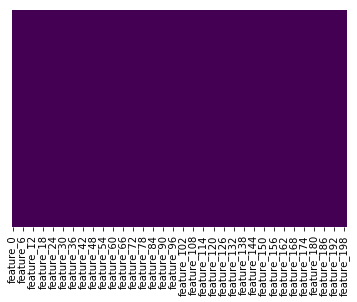

In [129]:
sns.heatmap(encoded_train.isnull(),yticklabels = False,cbar = False,cmap = 'viridis')

In [130]:
missing_val_count_by_column = (encoded_test.isnull().sum())
print(missing_val_count_by_column[missing_val_count_by_column > 0])

Series([], dtype: int64)


In [ ]:
#encoder + PCA

In [132]:
from sklearn.decomposition import PCA
pca = PCA(n_components=None)
x_train = pca.fit_transform(encoded_train)
x_test = pca.transform(encoded_test)

In [133]:
explained_variance = pca.explained_variance_ratio_

In [154]:
explained_variance

array([8.97473604e-01, 2.28919843e-02, 4.98794875e-03, 4.69555576e-03,
       4.23348429e-03, 3.68658014e-03, 3.42102965e-03, 3.24942381e-03,
       3.03642646e-03, 2.67495772e-03, 2.60997540e-03, 2.48250535e-03,
       2.25411615e-03, 2.08806940e-03, 1.87029800e-03, 1.85866663e-03,
       1.74378075e-03, 1.68813810e-03, 1.61853364e-03, 1.57225220e-03,
       1.51810742e-03, 1.31366891e-03, 1.23943480e-03, 1.17016032e-03,
       1.13433902e-03, 1.10993052e-03, 1.03575827e-03, 9.83813132e-04,
       9.52596881e-04, 9.12104748e-04, 8.71536401e-04, 8.14067449e-04,
       7.52020069e-04, 7.22843244e-04, 7.08292682e-04, 7.07290497e-04,
       6.88218031e-04, 6.50108635e-04, 6.15660919e-04, 5.80930795e-04,
       5.18668619e-04, 4.94803641e-04, 4.87798182e-04, 4.55109649e-04,
       4.39102564e-04, 4.24111997e-04, 3.98657719e-04, 3.77176515e-04,
       3.60552871e-04, 3.51806812e-04, 3.43929663e-04, 3.29616932e-04,
       3.19127987e-04, 2.93495596e-04, 2.87856775e-04, 2.61497828e-04,
      

In [152]:
xgb = xgboost.XGBRegressor(n_estimators=35, learning_rate=0.06, gamma=0, subsample=0.6,
                           colsample_bytree=0.7, min_child_weight=4, max_depth=3)
                           
                           
xgb.fit(x_train,y_train)
predictions = xgb.predict(x_test)
print(metrics.mean_squared_error(y_test, predictions))

0.9184666846350971


In [150]:
rand = RandomForestRegressor(n_estimators = 10,random_state = 0)
rand.fit(x_train,y_train)
y_pred2 = rand.predict(x_test)
print(metrics.mean_squared_error(y_test,y_pred2 ))


3.0088379732492547


In [151]:
logreg=LinearRegression()
logreg.fit(x_train,y_train)
y_pred=logreg.predict(x_test)

y_pred
print(metrics.mean_squared_error(y_test, y_pred))


2.8860584752682324e+23


In [153]:
regressor = DecisionTreeRegressor( random_state = 0)
regressor.fit(x_train,y_train)
y_pred1 = regressor.predict(x_test)
print(metrics.mean_squared_error(y_test,y_pred1 ))

5.3416815129317925


In [139]:
scale_list = train2.columns[1:]
sc = train2[scale_list]
scaler = StandardScaler()
sc = scaler.fit_transform(sc)
train2[scale_list] = sc
train2[scale_list].head()

X = train2.drop(['target','ID'], axis=1)
Y = train2['target']
X_train, X_test, y_train, y_test = train_test_split(X, Y ,test_size=0.2)

In [ ]:
#PCA ONLY

In [156]:
from sklearn.decomposition import PCA
pca = PCA(n_components=None)
x2_train = pca.fit_transform(X_train)
x2_test = pca.transform(X_test)

In [157]:
explained_variance2 = pca.explained_variance_ratio_

In [158]:
regressor = DecisionTreeRegressor( random_state = 0)
regressor.fit(x2_train,y_train)
y_pred1 = regressor.predict(x2_test)
print(metrics.mean_squared_error(y_test,y_pred1 ))

5.3416815129317925


In [159]:
xgb = xgboost.XGBRegressor(n_estimators=35, learning_rate=0.06, gamma=0, subsample=0.6,
                           colsample_bytree=0.7, min_child_weight=4, max_depth=3)
                           
                           
xgb.fit(x2_train,y_train)
predictions = xgb.predict(x2_test)
print(metrics.mean_squared_error(y_test, predictions))

0.9184666846350971


In [160]:
rand = RandomForestRegressor(n_estimators = 10,random_state = 0)
rand.fit(x2_train,y_train)
y_pred2 = rand.predict(x2_test)
print(metrics.mean_squared_error(y_test,y_pred2 ))


3.0088379732492547


In [162]:
logreg=LinearRegression()
logreg.fit(x2_train,y_train)
y_pred=logreg.predict(x2_test)

y_pred
print(metrics.mean_squared_error(y_test, y_pred))


2.8860584752682324e+23


In [145]:
#KERNEL PCA + ENCODER

In [146]:
from sklearn.decomposition import  KernelPCA
kpca = KernelPCA(n_components = 2, kernel = 'rbf')
x4_train = kpca.fit_transform(encoded_train)
x4_test = kpca.transform(encoded_test)

In [147]:
regressor = DecisionTreeRegressor( random_state = 0)
regressor.fit(x4_train,y_train)
y_pred1 = regressor.predict(x4_test)
print(metrics.mean_squared_error(y_test,y_pred1 ))

2.1897963692832154


In [148]:
xgb = xgboost.XGBRegressor(n_estimators=35, learning_rate=0.06, gamma=0, subsample=0.6,
                           colsample_bytree=0.7, min_child_weight=4, max_depth=3)
                           
                           
xgb.fit(x4_train,y_train)
predictions = xgb.predict(x4_test)
print(metrics.mean_squared_error(y_test, predictions))

1.0717463743702915


In [149]:
rand = RandomForestRegressor(n_estimators = 10,random_state = 0)
rand.fit(x4_train,y_train)
y_pred2 = rand.predict(x4_test)
print(metrics.mean_squared_error(y_test,y_pred2 ))

3.0088379732492547


In [163]:
logreg=LinearRegression()
logreg.fit(x4_train,y_train)
y_pred=logreg.predict(x4_test)

y_pred
print(metrics.mean_squared_error(y_test, y_pred))


1.071997067379852
